In [2]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read data
df=pd.read_csv(r'Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


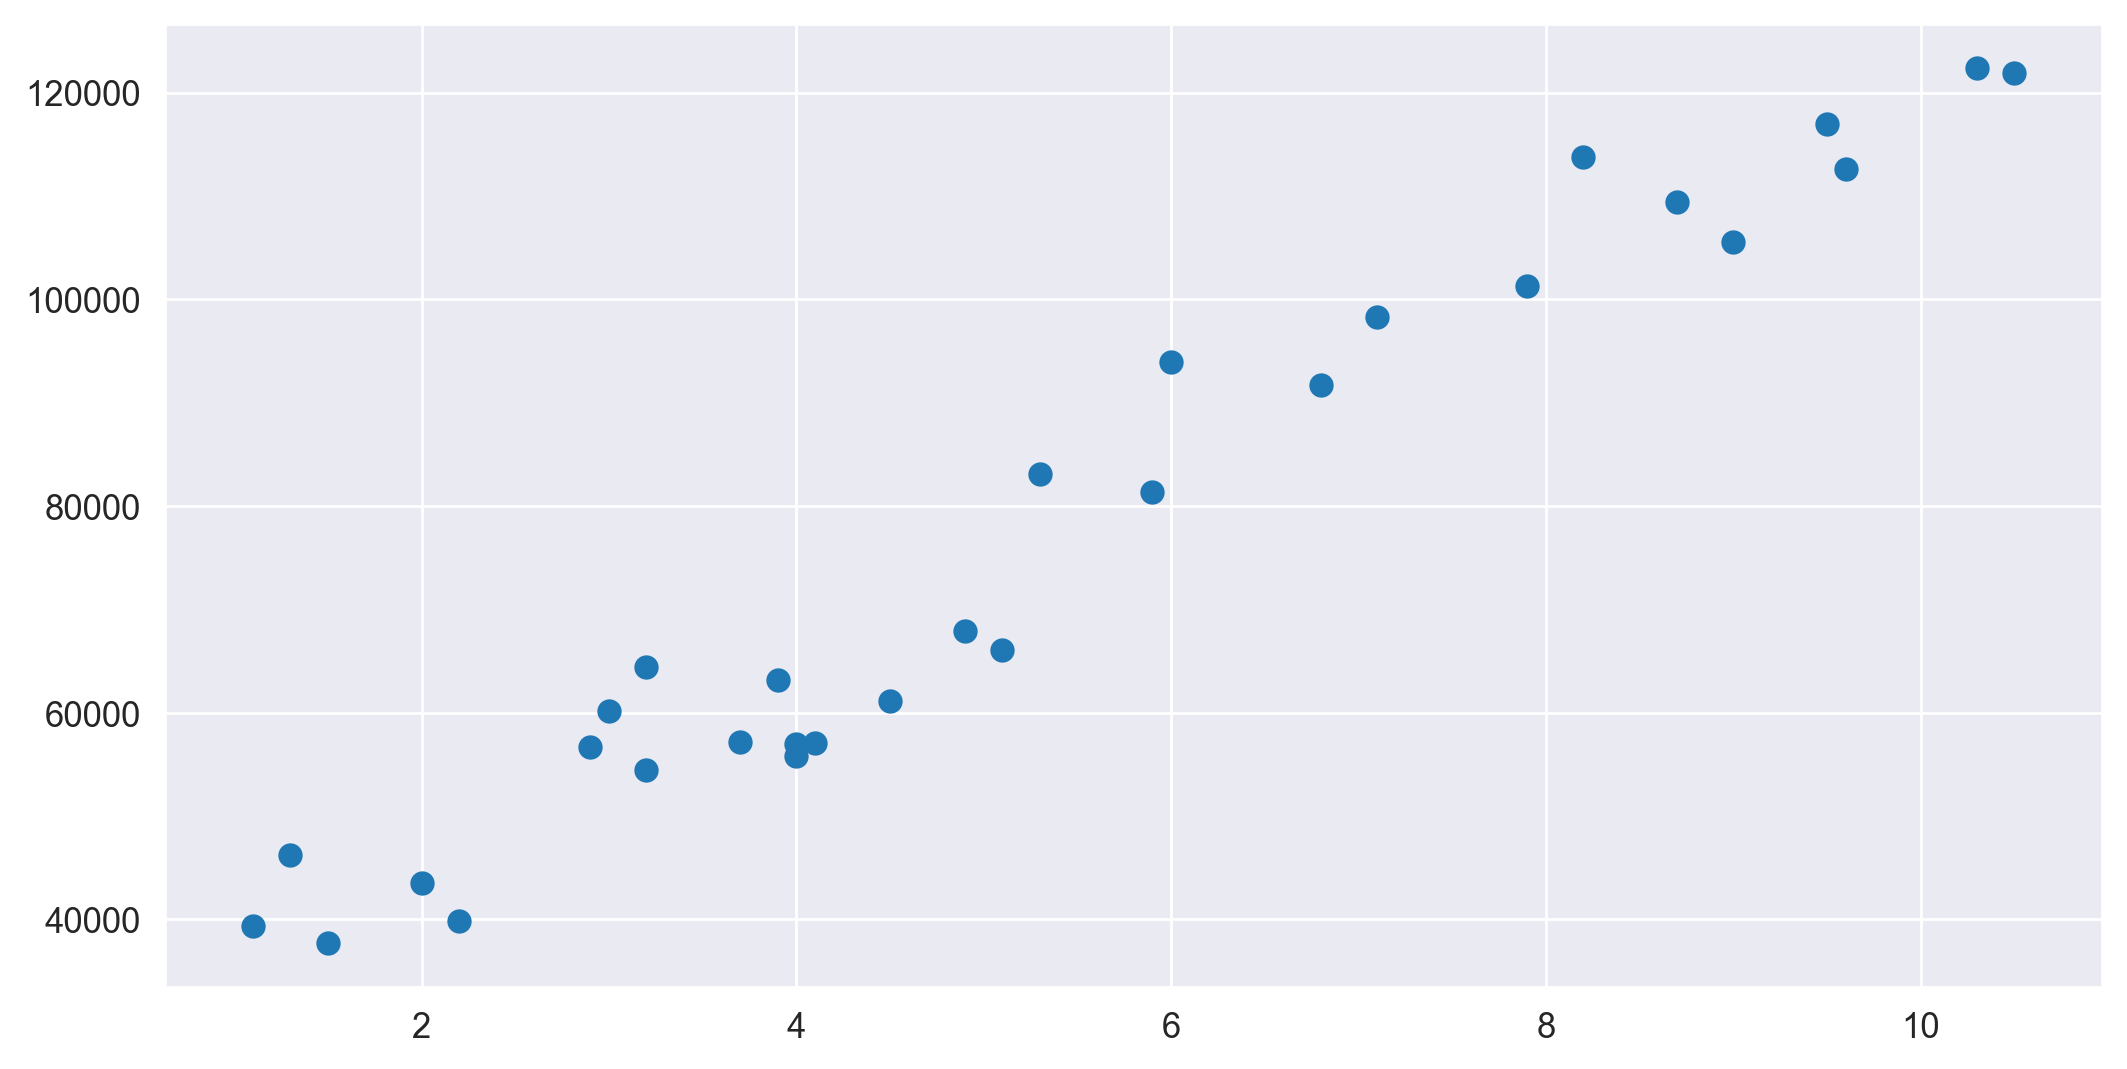

In [4]:
# understand the relationship 
# Approach 1 -Scatterplot
plt.scatter(df['YearsExperience'],df['Salary'])

In [5]:
#approach 2- corr()
df.corr()  

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
#printing the duplicate values
df.duplicated().sum()

0

In [9]:
#check the null values
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience'>

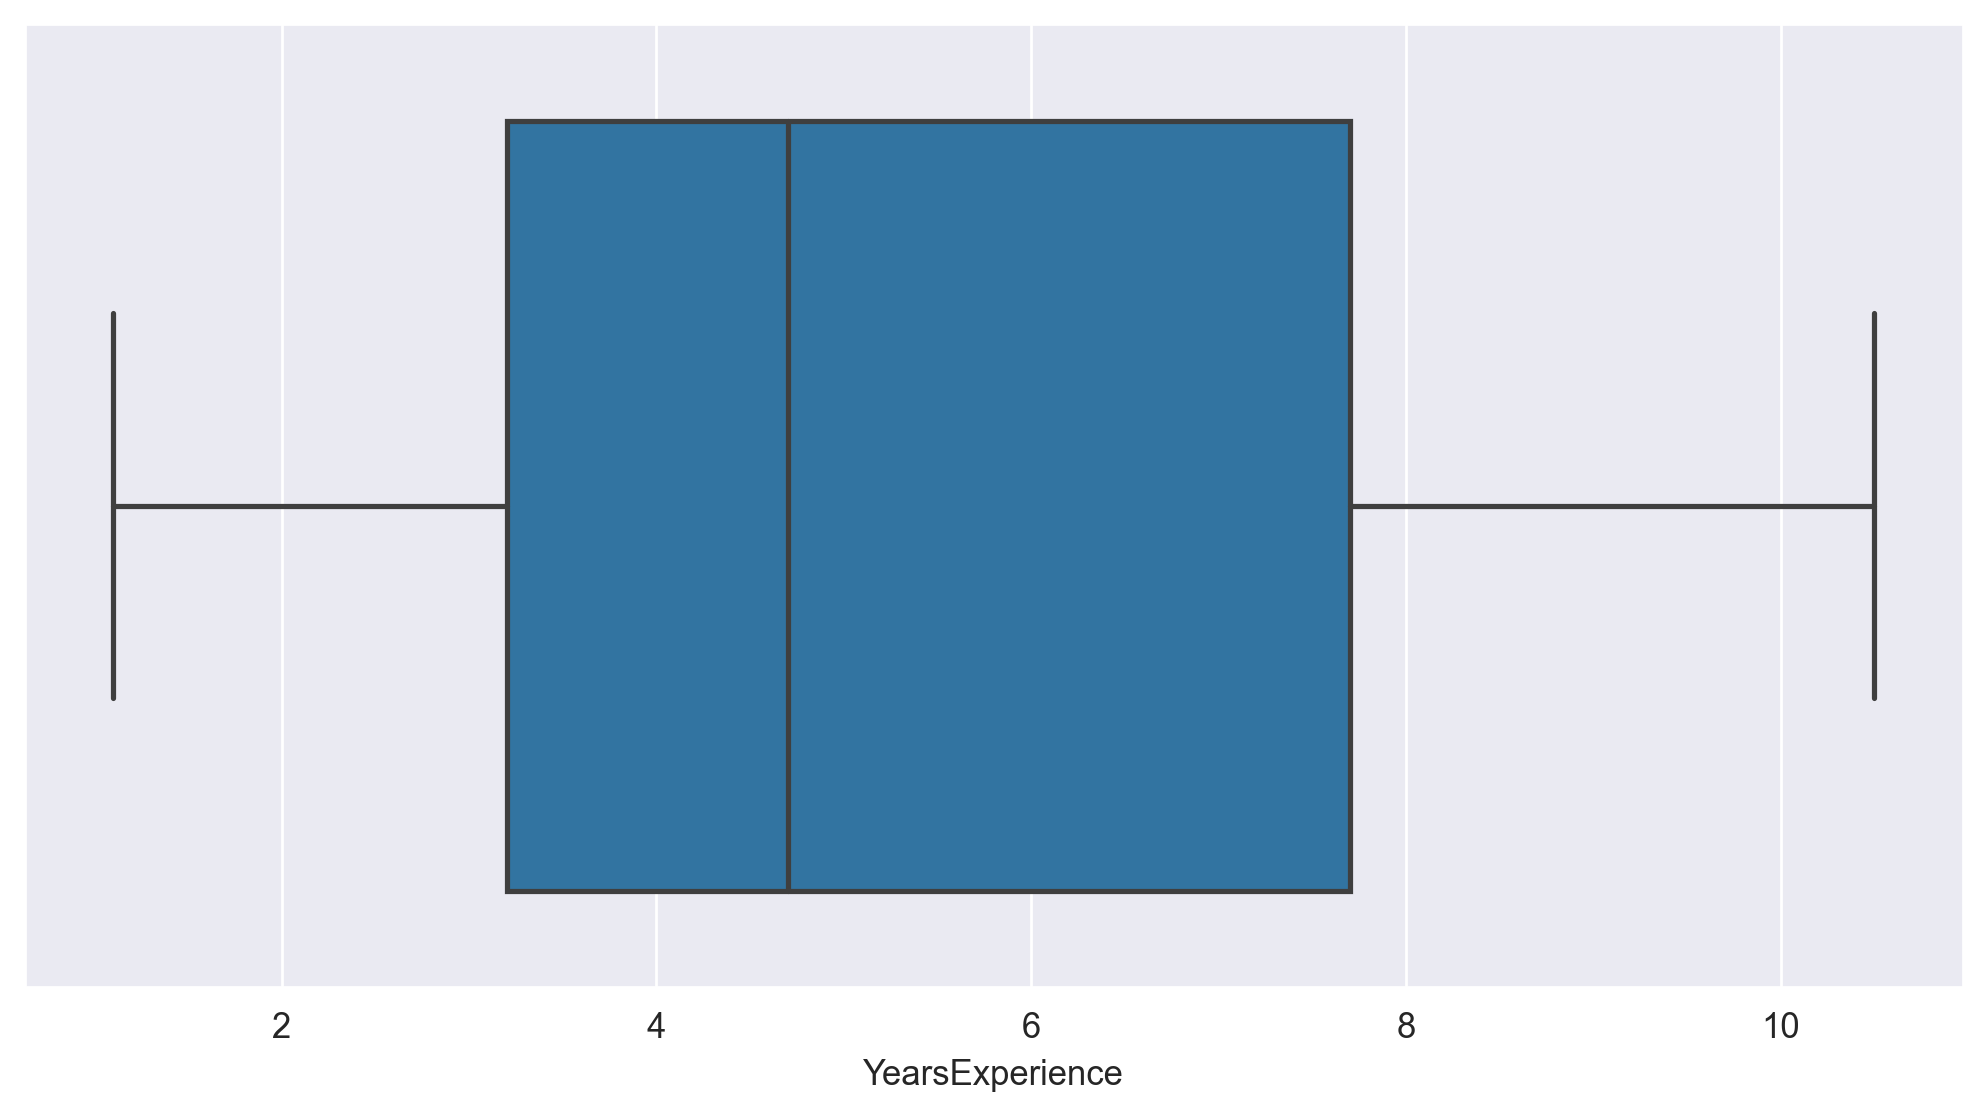

In [10]:
sns.boxplot(df['YearsExperience']) # no outliers are present

{'whiskers': [<matplotlib.lines.Line2D at 0x1601d51e220>,
 'caps': [<matplotlib.lines.Line2D at 0x1601d51e7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1601d50df10>],
 'medians': [<matplotlib.lines.Line2D at 0x1601d51ed60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1601d52a070>],
 'means': []}

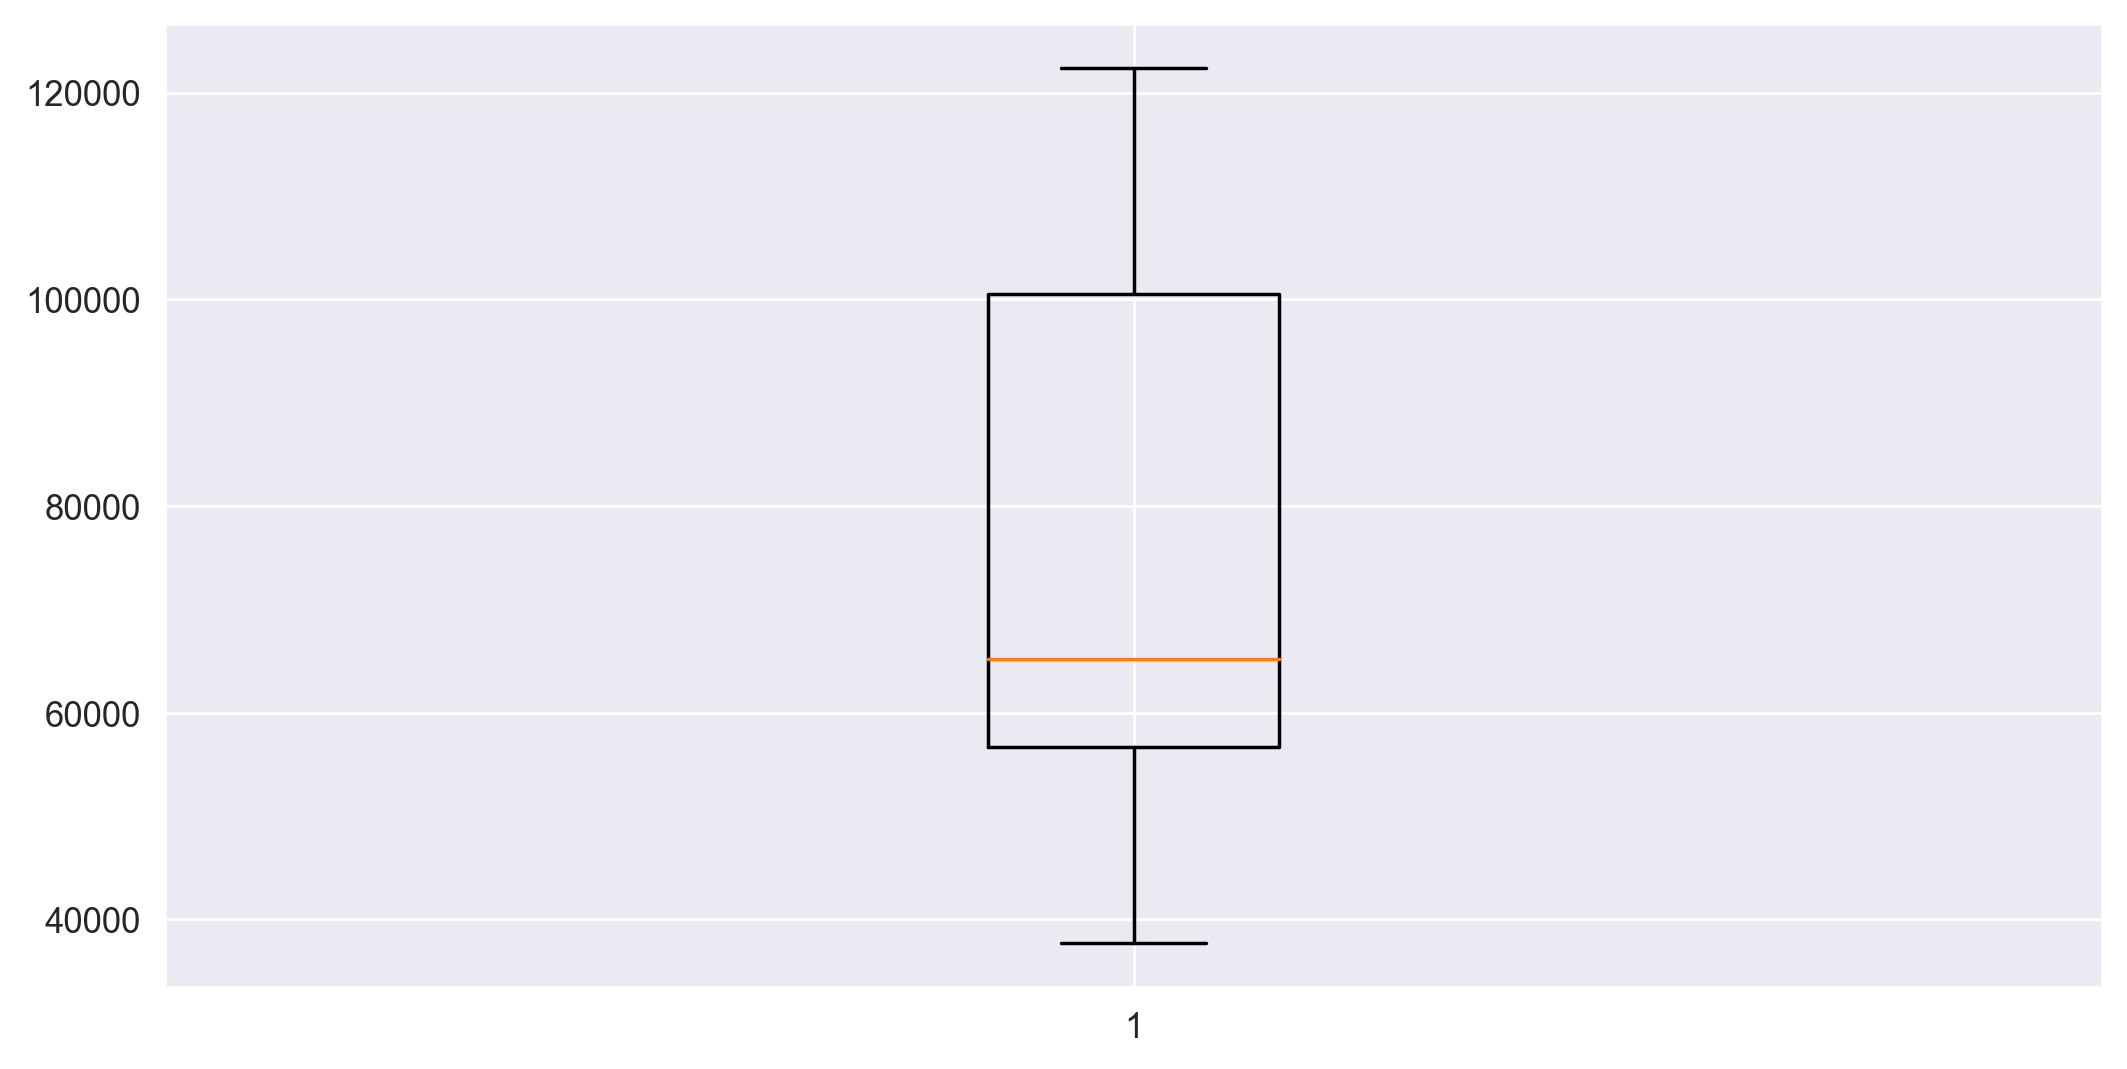

In [11]:
plt.boxplot(df['Salary'])

Text(0.5, 1.0, 'salary')

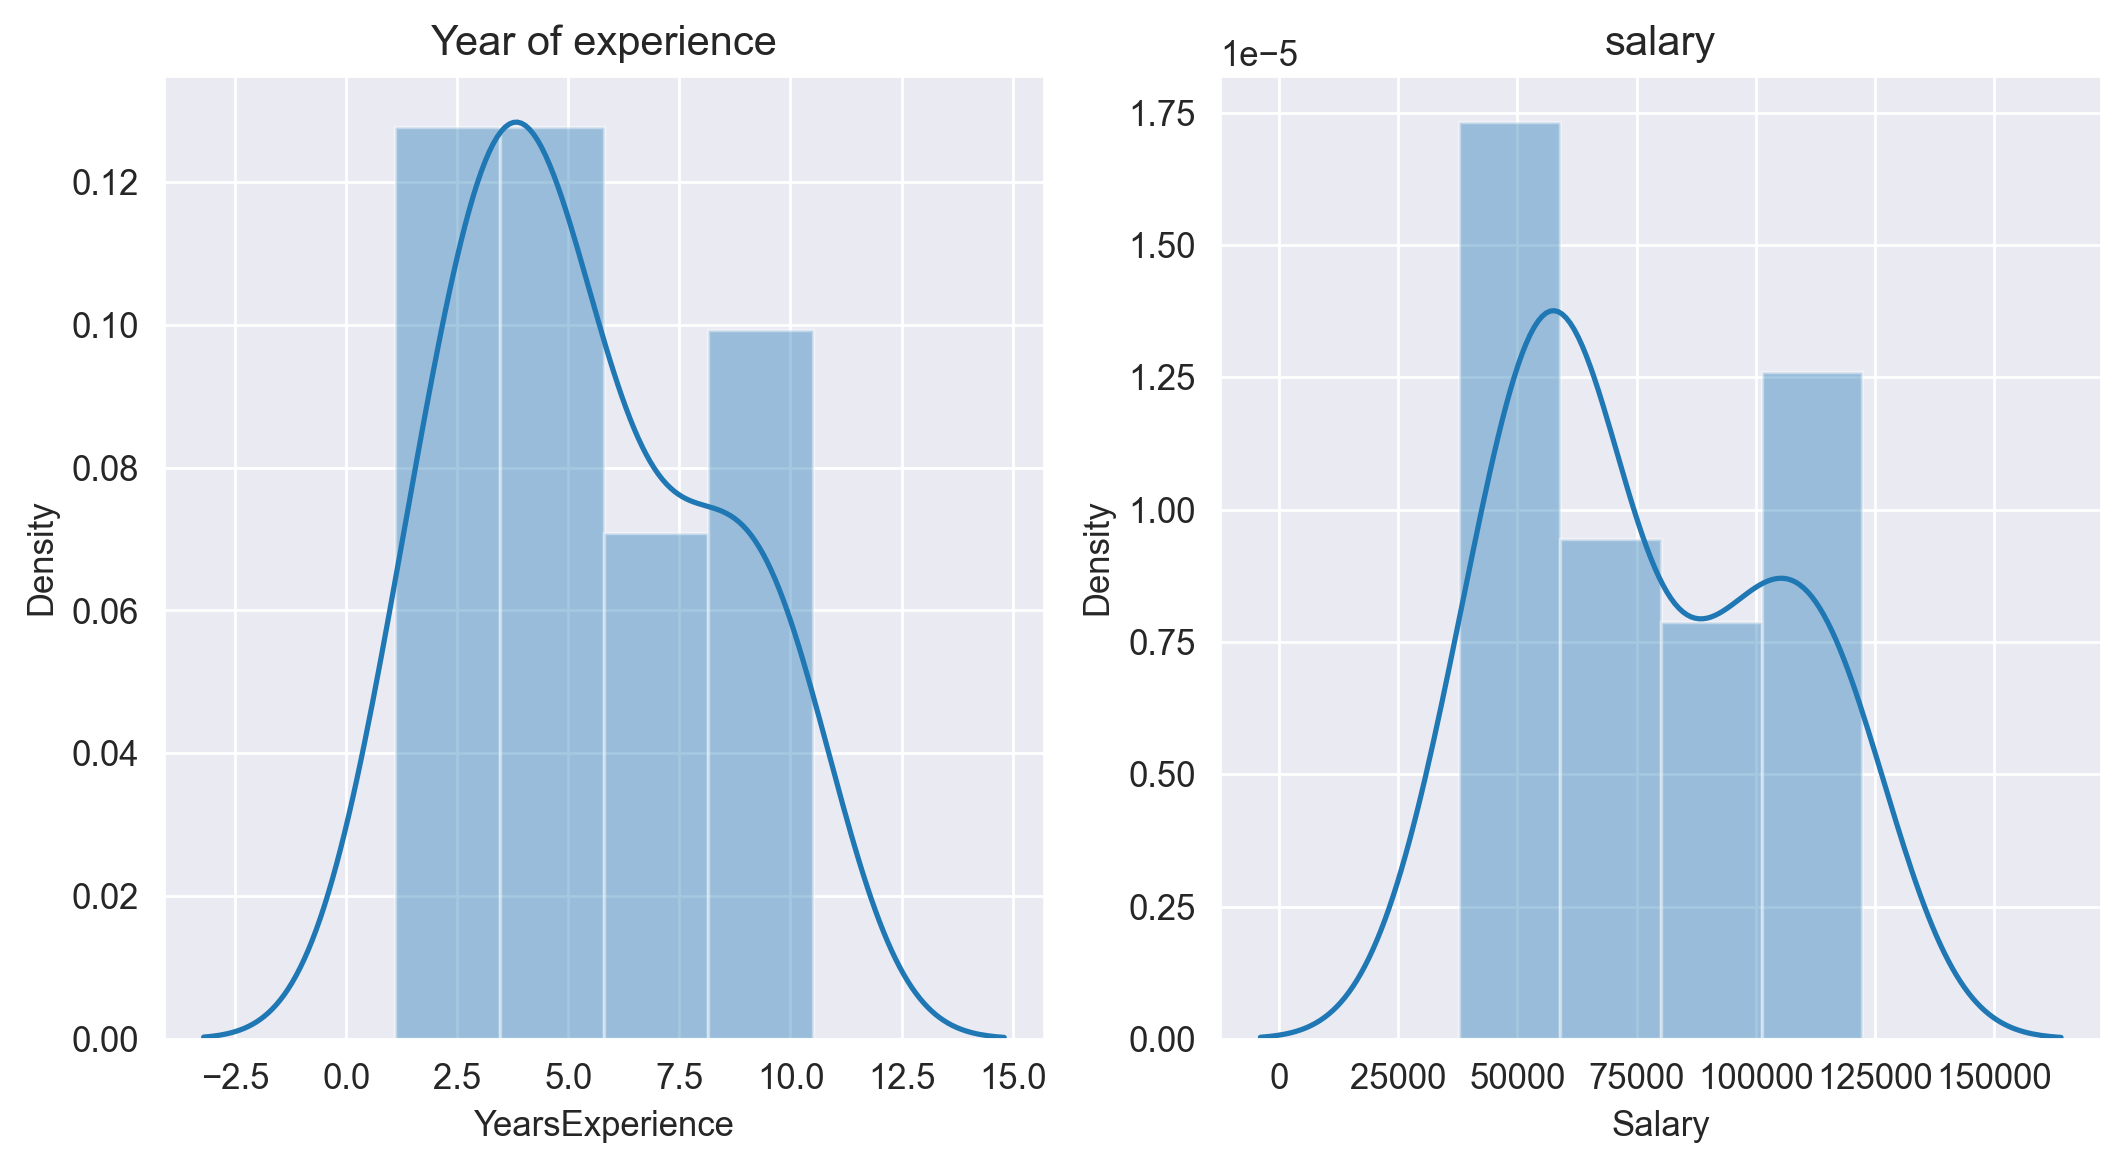

In [12]:
#plotting graph to check the data follows normal distribution or not

plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])
plt.title('Year of experience')

plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.title('salary')

Numerical variables may have high skewed and non-normal distribution (Gaussian Distribution) caused by outliers, highly exponential distributions, etc. Therefore we go for data transformation.

# Model building with no transformation

In [13]:
# import statsmodel library
import statsmodels.formula.api as smf

In [14]:
#create a model
model=smf.ols('Salary~YearsExperience', data=df).fit()    #straightline equation

In [15]:
c,m=model.params
c,m

(25792.200198668703, 9449.962321455077)

In [16]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [17]:
#checking model accuracy

model.rsquared

0.9569566641435086

# Prediction

In [18]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [19]:
YearExperience= 1.2

y= m*YearExperience + c   #y is the salary that the model going to predict

In [20]:
y

37132.154984414796

# Model building with sqrt transformation

In [22]:
model2 = smf.ols('Salary ~ np.sqrt(YearsExperience)', data=df).fit()

In [23]:
#checking model accuracy

model2.rsquared

0.9310009544993526

# Model building with logarithm transformation

In [24]:
model3 = smf.ols('Salary ~ np.sqrt(YearsExperience)', data=df).fit()

In [25]:
#checking model accuracy

model.rsquared

0.9569566641435086

# Model building with exponential transformation

In [26]:
model4 = smf.ols('Salary ~ np.sqrt(YearsExperience)', data=df).fit()

In [27]:
#checking model accuracy

model4.rsquared

0.9310009544993526

# Model building with cube root transformation

In [28]:
model5 = smf.ols('Salary ~ np.sqrt(YearsExperience)', data=df).fit()

In [29]:
#checking model accuracy

model5.rsquared

0.9310009544993526

Among all the tranformation the model with no tranformaion showing rsqured value 0.9569566641435086 and logarithm transformation with rsqured value is 0.9569566641435086 both has high rsqured value

In [ ]:
model5.predict()